In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from textblob import TextBlob
from tqdm import tqdm
from math import log
import matplotlib.pyplot as plt
from collections import Counter
from itertools import dropwhile, takewhile

plt.style.use('seaborn-talk')
tqdm.pandas()

C:\Users\UserA\AppData\Local\Temp\ipykernel_208\3015838273.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [2]:
reviews_df = pd.read_csv(r"F:\Μαθήματα_Στέργιος\Ανάκτηση_Πληροφορίας_Από_Μηχανές_Αναζήτησης\PP2\movie_review.csv")
reviews_df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


pos    32937
neg    31783
Name: tag, dtype: int64


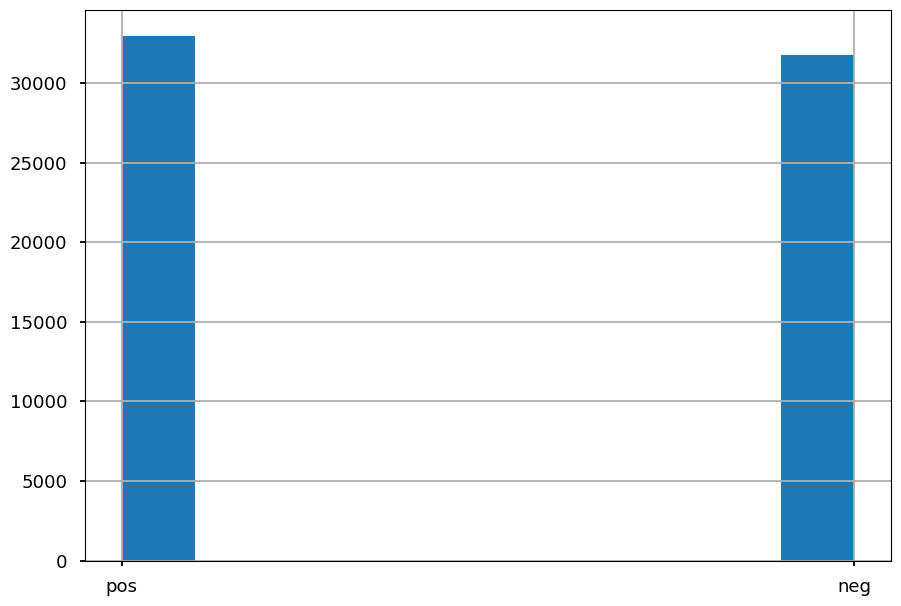

In [3]:
reviews_df.tag.hist()
print(reviews_df.tag.value_counts())

100%|██████████████████████████████████████████████████████████████████████████| 64720/64720 [00:35<00:00, 1846.50it/s]


count    64720.000000
mean        20.423857
std         12.066003
min          0.000000
25%         12.000000
50%         19.000000
75%         27.000000
max        156.000000
Name: text_len, dtype: float64

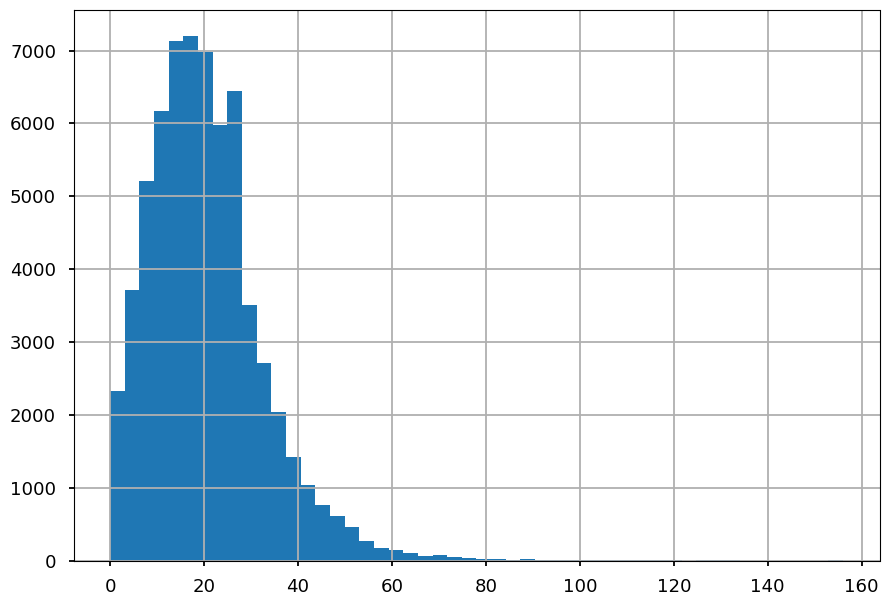

In [4]:
reviews_df['text_len'] = reviews_df.text.progress_apply(lambda txt: len(TextBlob(txt).words))
reviews_df.text_len.hist(bins=50)
reviews_df.text_len.describe()

In [5]:
## probably we need to remove too short reviews
reviews_df[reviews_df.text_len <= 3].head()

,fold_id,cv_tag,html_id,sent_id,text,tag,text_len
48,0,cv001,18431,23,and so on .,pos,3
49,0,cv001,18431,24,what happened ?,pos,2
86,0,cv003,11664,3,dah-dum .,pos,1
316,0,cv010,29198,37,but enough carping .,pos,3
438,0,cv015,29439,17,you see . . . dreams,pos,3


# Multinomial Naive Bayes and Bernoulli Naive Bayes Classifiers


 Percent accuracy within each fold:

[0.69880511 0.69447878 0.69643593 0.69674495 0.69561187]

Mean accuracy:

0.696415327564895


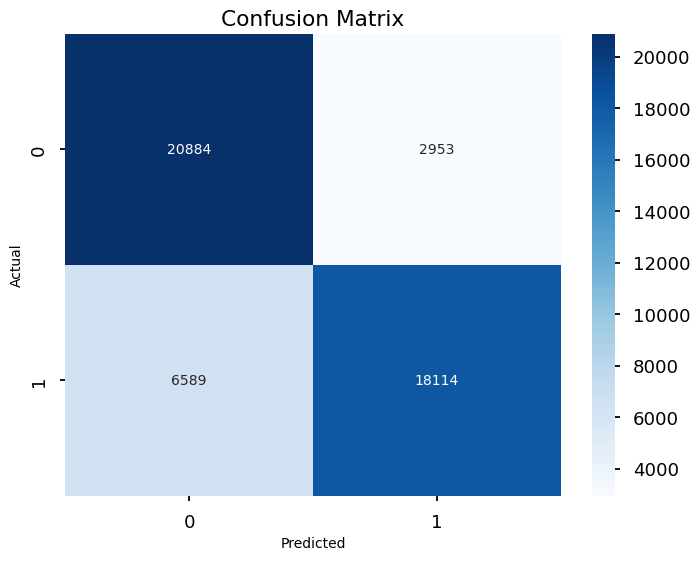

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
pd.set_option('display.max_columns',None)
data = pd.read_csv(r"F:\Μαθήματα_Στέργιος\Ανάκτηση_Πληροφορίας_Από_Μηχανές_Αναζήτησης\PP2\movie_review.csv")

#print(data.columns)
#print(data.head())

def preprocess_data(data):
    
    
    # Convert text to lowercase
    data['text'] = data['text'].str.strip().str.lower()
    return data

data = preprocess_data(data)
# Split into training and testing data
x = data['text']
y = data['tag']
cv = CountVectorizer()
x = cv.fit_transform(x)
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

bnb = BernoulliNB(binarize=0.0)
scores = cross_val_score(bnb,x,y,cv=5,scoring="accuracy")
print("\n Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())

# Evaluate the model using accuracy
bnb.fit(x,y)
y_pred_bnb = bnb.predict(x)


# Confusion matrix
conf_matrix = metrics.confusion_matrix(y, y_pred_bnb)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#model = bnb.fit(x,y)
#y_pred = bnb.predict(x_test)
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))
#print(x.head())
#print(x_test.head())
#print(y.head())
#print(y_test.head())



 Percent accuracy within each fold:

[0.69767202 0.70210136 0.69550886 0.6934487  0.70580964]

Mean accuracy:

0.6989081170168934


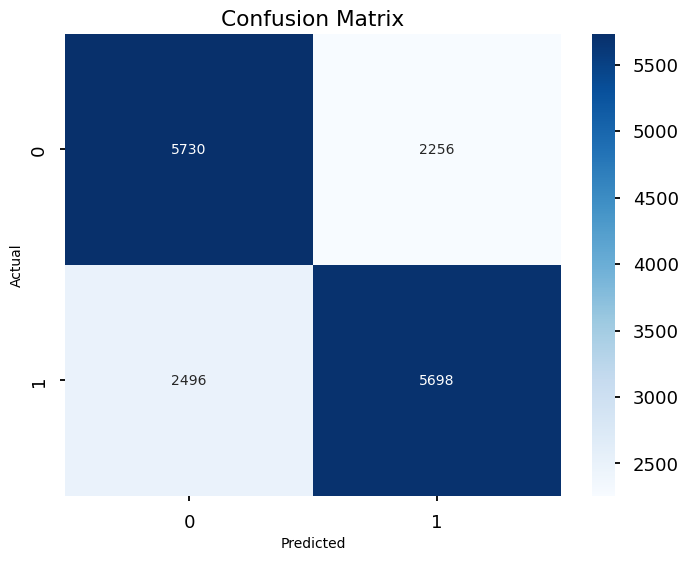

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns',None)
data = pd.read_csv(r"F:\Μαθήματα_Στέργιος\Ανάκτηση_Πληροφορίας_Από_Μηχανές_Αναζήτησης\PP2\movie_review.csv")

#print(data.columns)
#print(data.head())

def preprocess_data(data):
    
    
    # Convert text to lowercase
    data['text'] = data['text'].str.strip().str.lower()
    return data

data = preprocess_data(data)
# Split into training and testing data
x = data['text'].values
y = data['tag']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
 
# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True)
mnb.fit(X_train_vec, y_train)
scores = cross_val_score(mnb,X_train_vec,y_train,cv=5,scoring="accuracy")
print("\n Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())
 

# Evaluate the model using accuracy 
y_pred_mnb = mnb.predict(X_test_vec)


# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_mnb)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()